# Desafio 1: Entendendo os estudantes.

##Informações da Base:
A base pode ser obtida no [kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/).

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias
disciplinas e suas informações pessoais.
Variáveis:

● gender - gênero do aluno

● race/ethnicity - raça/etnia dos alunos

● parental level of education - grau de escolaridade dos pais

● lunch - tipo de almoço

● test preparation course - indica se fez curso preparatório

● math score - nota na prova de matematica

● reading score - nota na prova de leitura

● writing score - nota na prova de escrita



In [12]:
#importação das bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
#importando a base
df_d1 = pd.read_csv('StudentsPerformance.csv')

In [14]:
#imprimindo as 10 linhas iniciais do data set para análise:

df_d1.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Pode-se observar acima que temos os seguintes tipos de variáveis:
- categóricas nominais:  gender, race/ethnicity , parental level of education, lunch, test preparation course.

- quantitativas discretas: math score, reading score, writing score.



In [15]:
df_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Acima verificamos que têm-se 1000 linhas e que não há dados faltantes. Também se é possível observar quais são as variáveis e seus respectivos tipos.

In [16]:
df_d1.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


O método acima expõe em uma tabela informações referentes as 3 variáveis quantitativas(math score, reading score, writing score).
Pode-se extrair da tabela as seguintes observações sobre a amostra:


*   As pontuações em leitura e escrita em média são próximas, matemática tem um desempenho médio menor.

*   Avaliando o desvio padrão(std) observa-se que a dispersão das notas é próxima, apesar de matemática apresentar uma menor variabilidade

*   Verificamos que em matemática a nota mínima é zero enquanto em leitura e escrita as menores pontuações são: 17 e 10 respectivamente.

*   Nas 3 avaliações percebe-se a pontuação máxima sendo 100. Esta observação mais a observação anterior nos leva a crer que as pontuações variem de 0 a 100.

*   Na tabela também é possível se avaliar os quartis.

*   De modo geral observa-se na amostra que de maneira geral os estudantes apresentam um desempenho menor em matemática.













##A seguir faremos as contagens que definem o tamanho dos grupos categorizados por uma variável qualitativa:


1. Raça/Etnia

Verifica-se a seguir que têm-se 5 grupos etnicos distintos.  O grupo C é o mais numeroso com 319 indivíduos e o grupo A, com 89 indivíduos, é o menos numeroso.

In [6]:
df_d1['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [21]:
#definindo paleta de cores

sns.set_palette("Set2")

<Axes: xlabel='race/ethnicity', ylabel='count'>

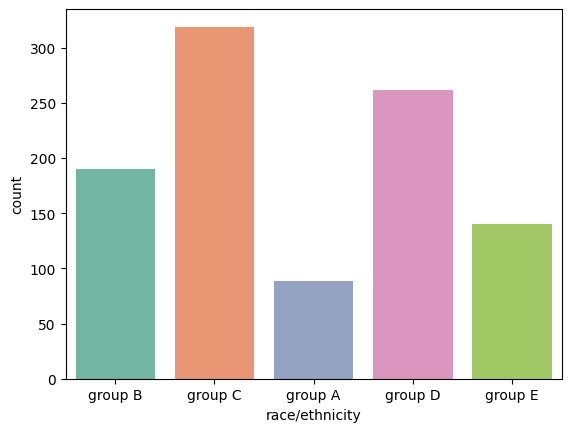

In [22]:
sns.countplot(data= df_d1, x='race/ethnicity')


Verificamos na amostra que de acordo com as médias o Grupo A apresenta o pior desempenho enquanto o grupo E apresenta um desempenho que se destaca em relação aos demais. Observa-se também a seguir que a variação das notas de leitura dentre os grupos C e D são menores.

In [23]:
df_d1.groupby(['race/ethnicity'])['math score','reading score','writing score'].mean()

<ipython-input-23-cc96b62350f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_d1.groupby(['race/ethnicity'])['math score','reading score','writing score'].mean()


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [24]:
df_d1.groupby(['race/ethnicity'])['math score','reading score','writing score'].std()

<ipython-input-24-90917fd7b2ee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_d1.groupby(['race/ethnicity'])['math score','reading score','writing score'].std()


,math score,reading score,writing score
race/ethnicity,,,
group A,14.523008,15.543762,15.468278
group B,15.468191,15.177499,15.625173
group C,14.852666,13.997033,14.983378
group D,13.769386,13.895306,14.367707
group E,15.534259,14.874024,15.113906


Pelo box plot vemos de maneira mais nítida o melhor desempenho do grupo E em matemática pois verificamos uma menor variabilidade e a mediana encontra-se acima dos demais blocos. No que se refere as notas de linguagens(leitura e escrita) verificamos que o grupo A contrasta, com um pior desempenho, em relação aos demais grupos.

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

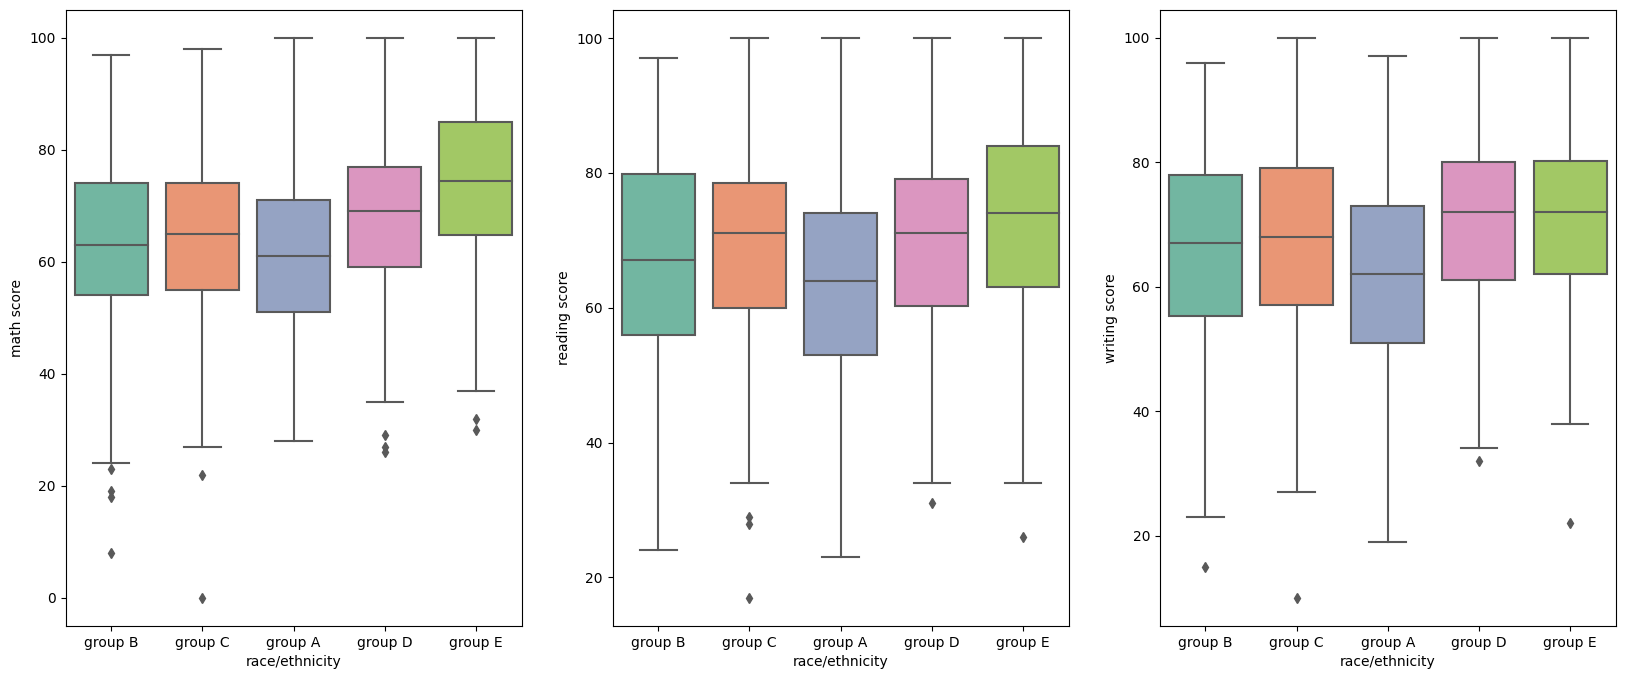

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(ax=axes[0], data= df_d1, x='race/ethnicity', y='math score')
sns.boxplot(ax=axes[1], data= df_d1, x='race/ethnicity', y='reading score')
sns.boxplot(ax=axes[2], data= df_d1, x='race/ethnicity', y='writing score')


2. Genero

<Axes: xlabel='gender', ylabel='count'>

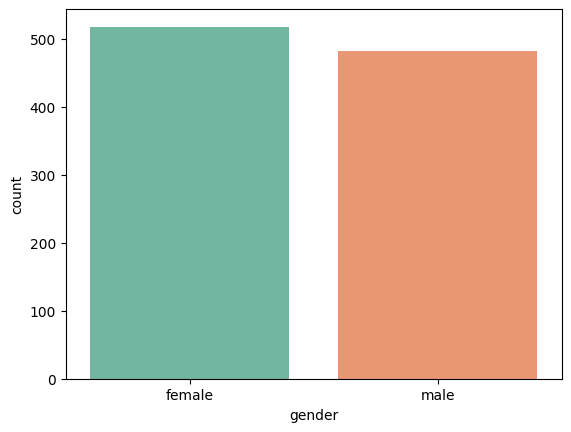

In [26]:
sns.countplot(data= df_d1, x='gender')


Verificamos que a amostra apresenta em sua maioria estudantes do sexo feminino. São 518 mulheres e 482 homens na amostra

In [27]:
df_d1['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [28]:
n_female = df_d1['gender'].value_counts()[0]
n_male = df_d1['gender'].value_counts()[1]

print('''Mulheres: {0}
 Homens: {1} '''.format(n_female, n_male))


Mulheres: 518 
 Homens: 482 


In [29]:
df_d1.groupby(['gender'])['math score','reading score','writing score'].std()

<ipython-input-29-331672feec0a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_d1.groupby(['gender'])['math score','reading score','writing score'].std()


,math score,reading score,writing score
gender,,,
female,15.491453,14.378245,14.844842
male,14.356277,13.931832,14.113832


In [30]:
df_d1.groupby(['gender'])['math score','reading score','writing score'].mean()

<ipython-input-30-2b468df9db88>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_d1.groupby(['gender'])['math score','reading score','writing score'].mean()


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<Axes: xlabel='gender', ylabel='writing score'>

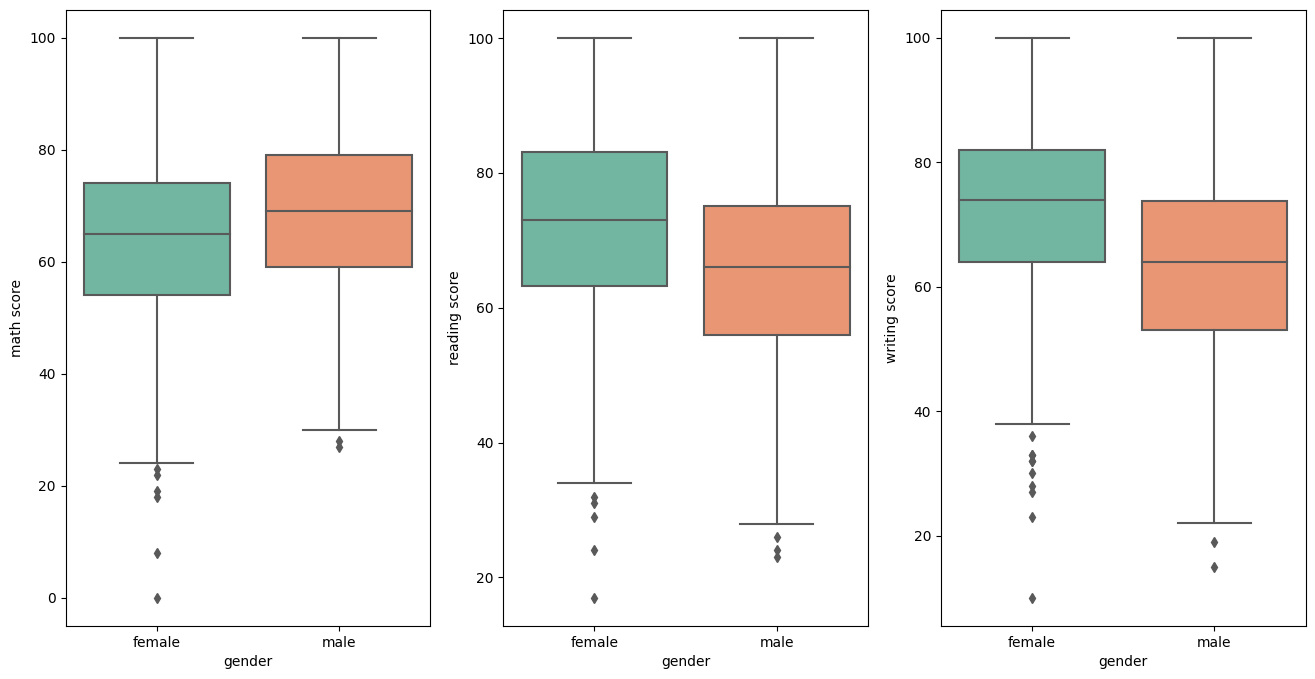

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

sns.boxplot(ax=axes[0], data= df_d1, x='gender', y='math score')
sns.boxplot(ax=axes[1], data= df_d1, x='gender', y='reading score')
sns.boxplot(ax=axes[2], data= df_d1, x='gender', y='writing score')




Verifica-se na amostra que há uma diferença de desempenho nas disciplinas, enquanto em matemática verificamos um desempenho médio superior nos alunos, em linguagens as alunas parecem se destacar.

3. Grau de Escolaridade dos Pais

In [32]:
df_d1['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [33]:
df_d1.groupby(['parental level of education'])['math score','reading score','writing score'].std()

<ipython-input-33-b83e97546c3c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_d1.groupby(['parental level of education'])['math score','reading score','writing score'].std()


,math score,reading score,writing score
parental level of education,,,
associate's degree,15.112093,13.868948,14.311122
bachelor's degree,14.943789,14.285250,14.728262
high school,14.539651,14.132130,14.085907
master's degree,15.153915,13.775163,13.730711
some college,14.312897,14.057049,15.012331
some high school,15.927989,15.479295,15.736197


In [34]:
df_d1.groupby(['parental level of education'])['math score','reading score','writing score'].mean()

<ipython-input-34-71026dab9ab6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_d1.groupby(['parental level of education'])['math score','reading score','writing score'].mean()


,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


Verificamos tanto nas tabelas como nas imagens que os alunos filhos de pais com mestrado apresentam um desempenho médio (principalmente em linguagens) superior aos demais. Em matemática apesar de apresentar uma baixa variabilidade os alunos filhos de pais com outros graus de escolaridade apresentam máximos mais elevados e uma distância  menos significativa das notas. Verificamos tb que os filhos de pais apenas com ensino médio ou parte dele apresentam um desempenho inferior em relação as notas.


<Axes: xlabel='parental level of education', ylabel='writing score'>

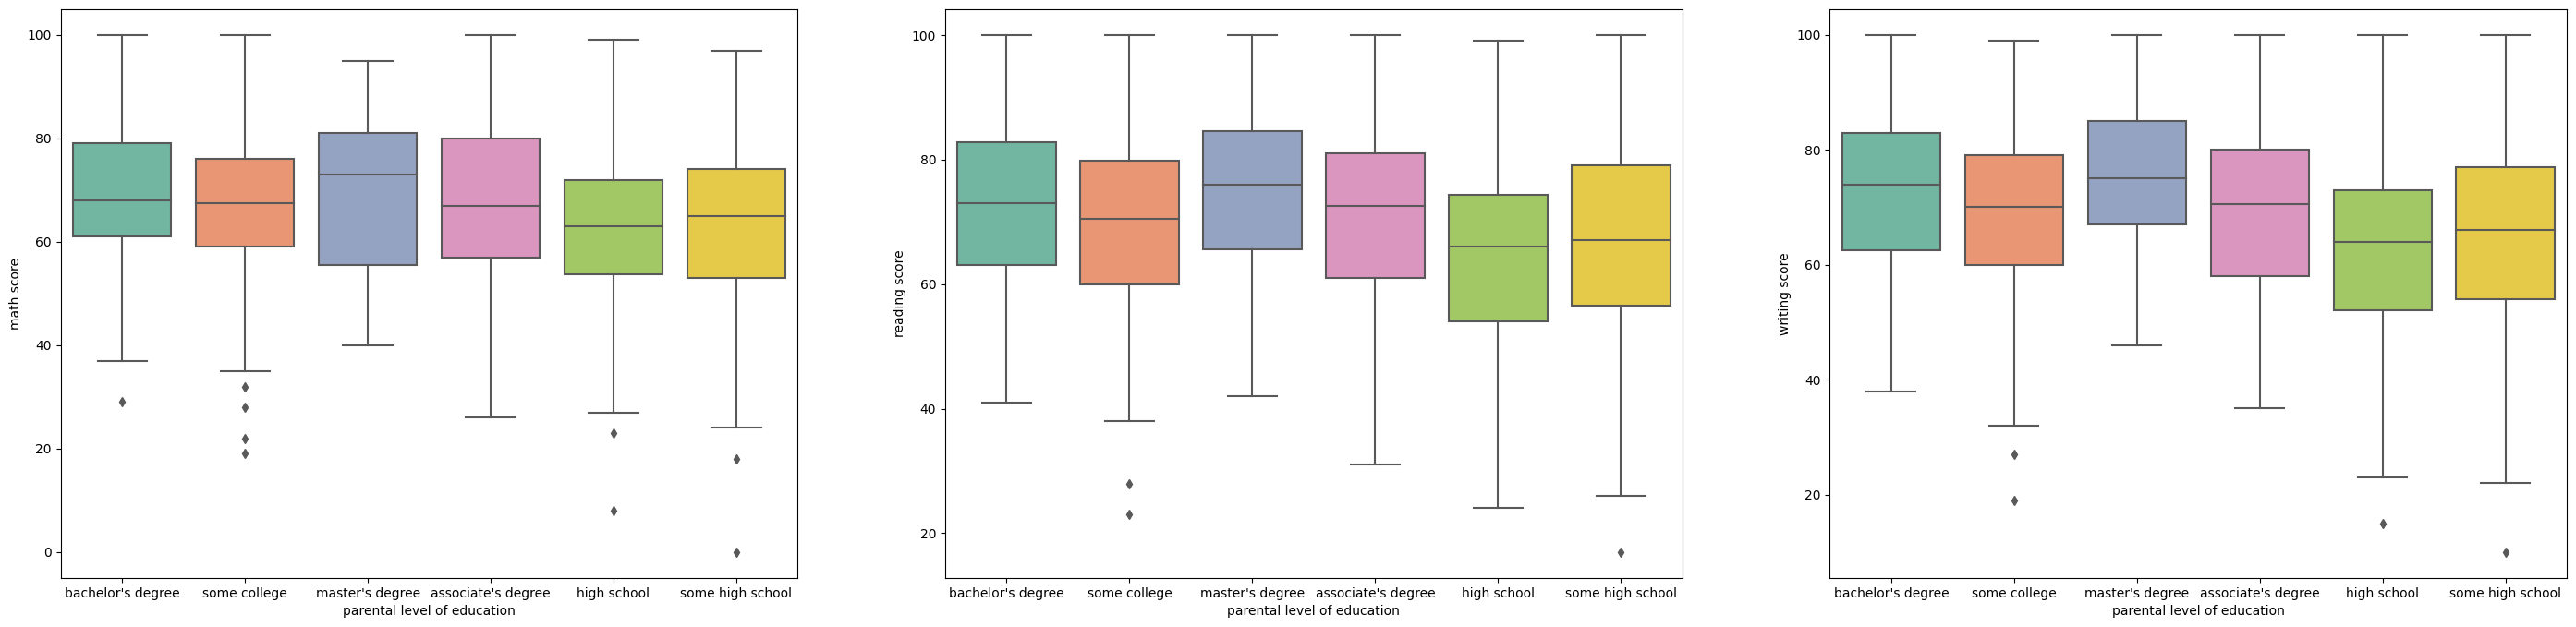

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(35, 8))

sns.boxplot(ax=axes[0], data= df_d1, x='parental level of education', y='math score')
sns.boxplot(ax=axes[1], data= df_d1, x='parental level of education', y='reading score')
sns.boxplot(ax=axes[2], data= df_d1, x='parental level of education', y='writing score')

4. tipo de almoço

In [36]:
df_d1['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [37]:
df_d1.groupby(['lunch'])['math score','reading score','writing score'].mean()

<ipython-input-37-39bd2ede4340>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_d1.groupby(['lunch'])['math score','reading score','writing score'].mean()


,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [38]:
df_d1.groupby(['lunch'])['math score','reading score','writing score'].std()

<ipython-input-38-b24d3df535f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_d1.groupby(['lunch'])['math score','reading score','writing score'].std()


,math score,reading score,writing score
lunch,,,
free/reduced,15.159956,14.895339,15.433823
standard,13.653501,13.830602,14.339487


Verificamos que o tipo de alimentação,na amostra, também é um fator que aparenta implicar no desempenho do aluno. Verificamos que o tipo 'standard' apresentam de modo geral notas superiores

<Axes: xlabel='lunch', ylabel='writing score'>

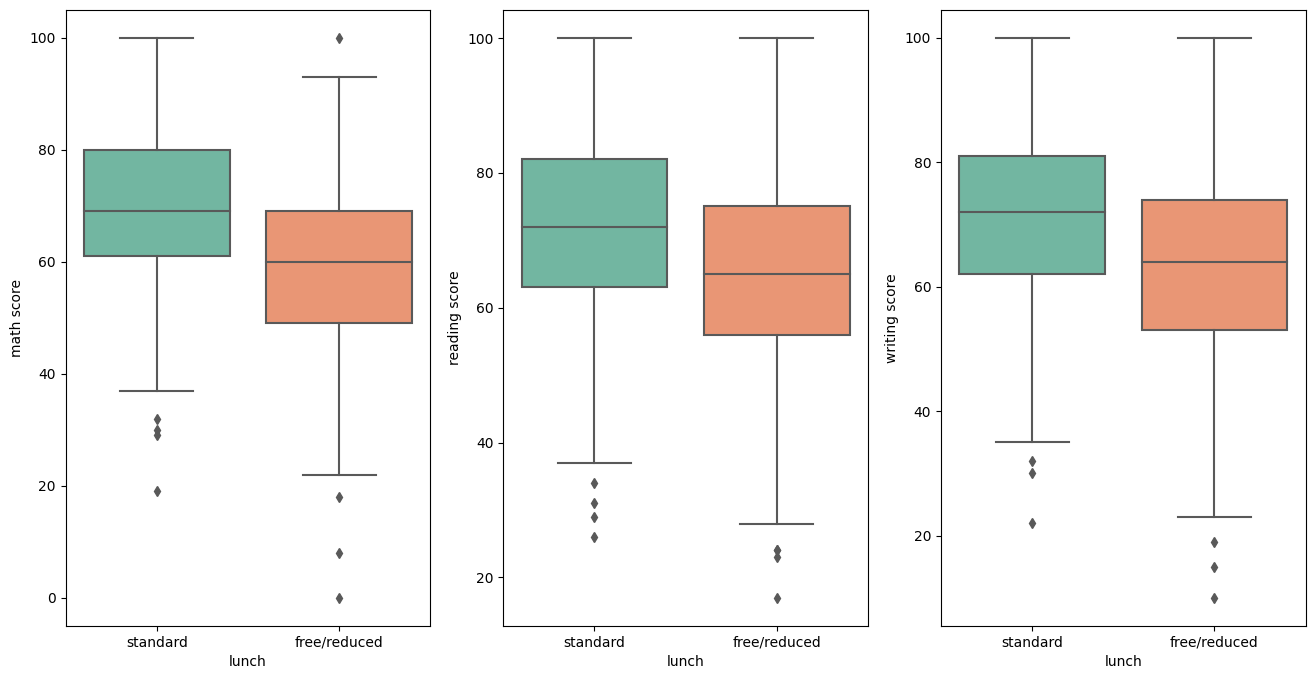

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

sns.boxplot(ax=axes[0], data= df_d1, x='lunch', y='math score')
sns.boxplot(ax=axes[1], data= df_d1, x='lunch', y='reading score')
sns.boxplot(ax=axes[2], data= df_d1, x='lunch', y='writing score')


### A tabela a seguir apresenta o percentual da escolaridade dos pais para cada grupo etnico:

verificamos que cerca de 47,19% dos pais do grupo A apresentam escolaridade até o ensino médio. Enquanto 28% dos pais dos alunos do grupo E apresentam escolaridade até o ensino médio.

In [40]:
100*pd.crosstab(df_d1['parental level of education'], df_d1['race/ethnicity'])/df_d1['race/ethnicity'].value_counts()

,group A,group B,group C,group D,group E
parental level of education,,,,,
associate's degree,15.730337,21.578947,24.451411,19.083969,27.857143
bachelor's degree,13.483146,10.526316,12.539185,10.687023,12.857143
high school,20.224719,25.263158,20.062696,16.793893,15.714286
master's degree,3.370787,3.157895,5.956113,8.778626,5.714286
some college,20.224719,19.473684,21.630094,25.572519,25.000000
some high school,26.966292,20.000000,15.360502,19.083969,12.857143


Verificamos também uma discrepância no tipo de almoço dos alunos de acordo com os grupos etnicos. Estes fatores listados podem indicar um certo desequilíbrio econômico entre os grupos.

In [41]:
100*pd.crosstab(df_d1['lunch'], df_d1['race/ethnicity'])/df_d1['race/ethnicity'].value_counts()

,group A,group B,group C,group D,group E
lunch,,,,,
free/reduced,40.449438,36.315789,35.736677,36.259542,29.285714
standard,59.550562,63.684211,64.263323,63.740458,70.714286


## Avaliação das variáveis quantitativas

### Distribuição das notas de Matemática



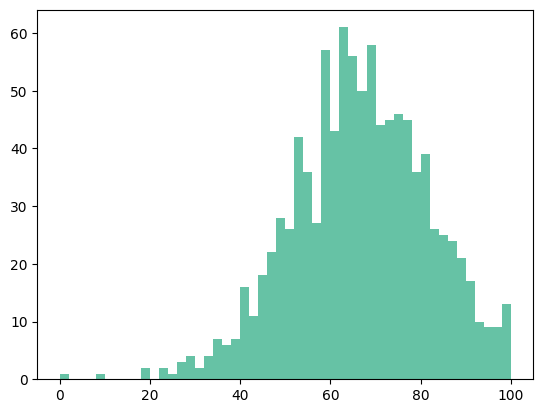

In [42]:
plt.hist(df_d1['math score'],bins=50)
plt.show()

### Distribuição das notas de Linguagens: leitura e Escrita, respectivamente:


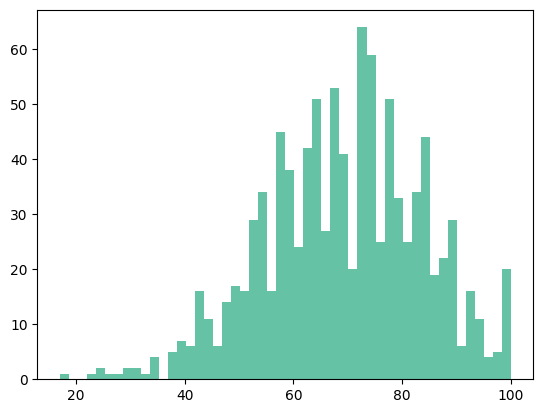

In [43]:
plt.hist(df_d1['reading score'],bins = 50)
plt.show()

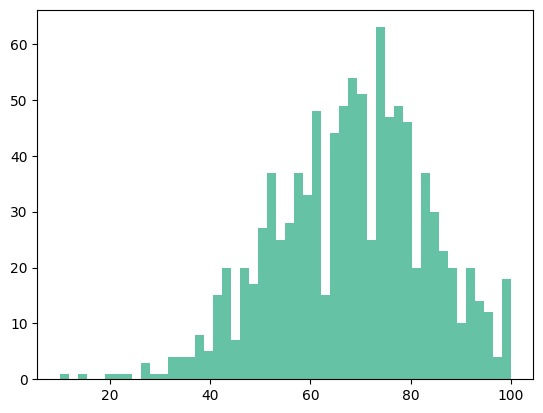

In [44]:
plt.hist(df_d1['writing score'], bins=50)
plt.show()

## Avaliação da relação das notas de Leitura e Escrita

<Axes: xlabel='reading score', ylabel='writing score'>

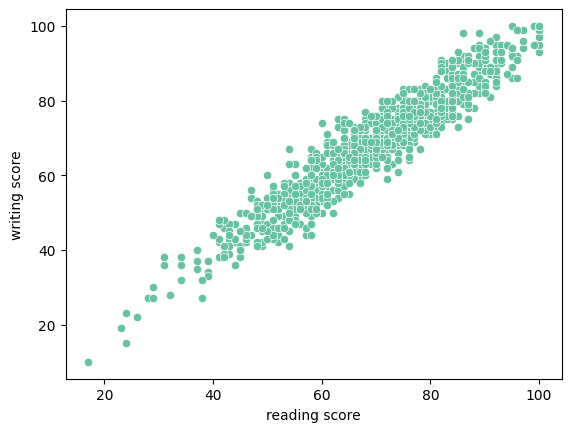

In [45]:
sns.scatterplot(data= df_d1, x='reading score', y='writing score')

O gráfico nos induz a crer que há uma relação linear entre as notas de leitura e escrita. Possivelmente apresentam uma correlação elevada e positiva. Na figura abaixo podemos verificar que há uma reta que aproxima bem os pontos.

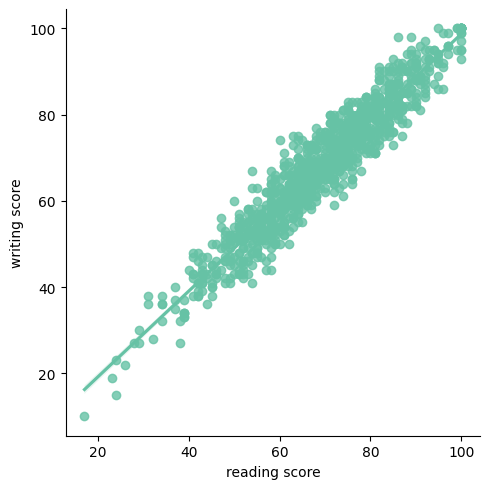

In [46]:
sns.lmplot(data= df_d1, x='reading score', y='writing score')

In [47]:
linguagens = df_d1[['reading score','writing score']]

In [48]:
linguagens.corr()

,reading score,writing score
reading score,1.000000,0.954598
writing score,0.954598,1.000000
